In [73]:
#importing libraries
import requests
import ast
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [74]:
#reading the nyc yellow taxi data api
nyc_taxi_api = "https://data.cityofnewyork.us/resource/gi8d-wdg5.json"

response = requests.get(nyc_taxi_api)

if response.status_code == 200:
    print("Data Reterival is Succeed")
    data_reterived = response.json()
else:
    print(f"Data Reterival is not succees {response.status_code}")

Data Reterival is Succeed


In [ ]:
data_reterived[1] #printing the retrived data 1 col value

{'vendorid': '2',
 'lpep_pickup_datetime': '2015-01-09T15:45:22.000',
 'lpep_dropoff_datetime': '2015-01-09T15:54:32.000',
 'store_and_fwd_flag': 'N',
 'ratecodeid': '1',
 'pickup_longitude': '-73.985671997070313',
 'pickup_latitude': '40.669933319091797',
 'dropoff_longitude': '-73.998367309570312',
 'dropoff_latitude': '40.679828643798828',
 'passenger_count': '3',
 'trip_distance': '1.15',
 'fare_amount': '7.5',
 'extra': '0',
 'mta_tax': '0.5',
 'tip_amount': '1.5',
 'tolls_amount': '0',
 'improvement_surcharge': '0.3',
 'total_amount': '9.8',
 'payment_type': '1',
 'trip_type': '1'}

In [76]:
#writing to csv
if isinstance(data_reterived, str):
    data_loaded = ast.literal_eval(data_reterived)
else:
    data_loaded = data_reterived

with open("Nyc_Yellow_Taxi_Trip_2023.csv","w",newline="") as file:
    columns=["vendorid",
                "lpep_pickup_datetime",
                "lpep_dropoff_datetime",
                "store_and_fwd_flag",
                "ratecodeid",
                "pickup_longitude",
                "pickup_latitude",
                "dropoff_longitude",
                "dropoff_latitude",
                "passenger_count",
                "trip_distance",
                "fare_amount",
                "extra",
                "mta_tax",
                "tip_amount",
                "tolls_amount",
                "improvement_surcharge",
                "total_amount",
                "payment_type",
                "trip_type"
            ]
    
    writer = csv.DictWriter(file,fieldnames=columns)

    writer.writeheader()

    for row in data_loaded:
        writer.writerow(row)
    
print("Data Exported!")

Data Exported!


In [77]:
#transforming using pandas
df_taxi = pd.read_csv("Nyc_Yellow_Taxi_Trip_2023.csv", parse_dates=['lpep_pickup_datetime','lpep_dropoff_datetime'])

df_taxi

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2015-02-10 08:46:15,2015-02-10 08:59:50,N,1,-73.828262,40.693958,-73.776329,40.645348,1,5.95,19.0,0.0,0.5,4.75,0.0,0.3,24.55,1,1
1,2,2015-01-09 15:45:22,2015-01-09 15:54:32,N,1,-73.985672,40.669933,-73.998367,40.679829,3,1.15,7.5,0.0,0.5,1.50,0.0,0.3,9.80,1,1
2,2,2015-01-16 22:07:38,2015-01-16 22:14:25,N,1,-73.892570,40.746658,-73.909294,40.736202,1,1.74,7.5,0.5,0.5,0.00,0.0,0.3,8.80,2,1
3,2,2015-02-11 20:12:29,2015-02-11 20:16:39,N,1,-73.952034,40.714123,-73.957848,40.710945,1,0.50,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1
4,2,2015-02-26 10:42:27,2015-02-26 10:57:30,N,1,-73.894104,40.750774,-73.912811,40.755722,2,1.80,11.0,0.0,0.5,0.00,0.0,0.3,11.80,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2015-02-06 16:56:29,2015-02-06 17:01:16,N,1,-73.851341,40.834091,-73.857460,40.833675,1,0.36,-5.0,-1.0,-0.5,0.00,0.0,0.3,-6.80,3,1
996,1,2015-02-08 12:13:24,2015-02-08 12:19:02,N,1,-73.939194,40.805363,-73.955254,40.785130,2,1.70,7.0,0.0,0.5,0.00,0.0,0.3,7.80,2,1
997,2,2015-02-24 23:31:21,2015-02-24 23:57:28,N,1,-73.963318,40.716774,-73.924805,40.695221,1,4.73,19.5,0.5,0.5,6.24,0.0,0.3,27.04,1,1
998,2,2015-02-14 18:51:39,2015-02-14 18:55:26,N,1,-73.945656,40.812725,-73.952950,40.810173,1,0.65,5.0,0.0,0.5,0.00,0.0,0.3,5.80,2,1


In [78]:
df_taxi.shape #prints row and columns

(1000, 20)

In [79]:
df_taxi.info() #info on dataframe is observed

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   vendorid               1000 non-null   int64         
 1   lpep_pickup_datetime   1000 non-null   datetime64[us]
 2   lpep_dropoff_datetime  1000 non-null   datetime64[us]
 3   store_and_fwd_flag     1000 non-null   str           
 4   ratecodeid             1000 non-null   int64         
 5   pickup_longitude       1000 non-null   float64       
 6   pickup_latitude        1000 non-null   float64       
 7   dropoff_longitude      1000 non-null   float64       
 8   dropoff_latitude       1000 non-null   float64       
 9   passenger_count        1000 non-null   int64         
 10  trip_distance          1000 non-null   float64       
 11  fare_amount            1000 non-null   float64       
 12  extra                  1000 non-null   float64       
 13  mta_tax        

In [ ]:
df_taxi.describe() #data set is analyzed

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.766000,2015-02-11 01:48:19.897999,2015-02-11 02:01:06.534000,1.102000,-73.932644,40.754972,-73.858797,40.712404,1.354000,2.719420,12.181200,0.334000,0.486500,1.034790,0.07576,0.290400,14.403750,1.558000,1.022000
min,1.000000,2015-01-01 00:10:28,2015-01-01 00:37:32,1.000000,-74.010147,40.575535,-74.257263,0.000000,1.000000,0.000000,-5.000000,-1.000000,-0.500000,0.000000,0.00000,0.000000,-6.800000,1.000000,1.000000
25%,2.000000,2015-02-04 21:17:04.250000,2015-02-04 21:24:08.750000,1.000000,-73.957802,40.702363,-73.963009,40.707464,1.000000,0.997500,6.000000,0.000000,0.500000,0.000000,0.00000,0.300000,7.800000,1.000000,1.000000
50%,2.000000,2015-02-13 21:44:51.500000,2015-02-13 21:58:55,1.000000,-73.941261,40.749189,-73.941856,40.752590,1.000000,1.805000,9.000000,0.500000,0.500000,0.000000,0.00000,0.300000,11.000000,2.000000,1.000000
75%,2.000000,2015-02-21 19:15:54.500000,2015-02-21 19:32:45.250000,1.000000,-73.912073,40.805252,-73.908628,40.803055,1.000000,3.612500,15.000000,0.500000,0.500000,1.560000,0.00000,0.300000,17.300000,2.000000,1.000000
max,2.000000,2015-02-28 23:50:48,2015-03-01 00:05:35,5.000000,-73.739189,40.892281,0.000000,40.974236,6.000000,25.900000,400.000000,1.000000,0.500000,18.150000,11.75000,0.300000,400.000000,4.000000,2.000000
std,0.423584,NaN,NaN,0.626089,0.040986,0.058256,2.338445,1.290108,1.005831,2.772257,14.952297,0.366167,0.084112,1.977005,0.67634,0.052826,15.676023,0.510781,0.146757


In [81]:

#calculating the total time of trip 
df_taxi["total_trip_time"] = df_taxi["lpep_dropoff_datetime"] - df_taxi["lpep_pickup_datetime"] # it will be in time delta component e.g. 0 days 00:08:26

#extracting the hour from datetime 
df_taxi["travelled_hour"] = df_taxi["lpep_pickup_datetime"].dt.hour

#extracting the day from datetime
df_taxi['weekday'] = df_taxi['lpep_pickup_datetime'].dt.day_name()

df_taxi.tail(25)

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,total_trip_time,travelled_hour,weekday
975,2,2015-02-20 15:47:33,2015-02-20 16:11:57,N,1,-73.918289,40.770088,-73.980904,40.737640,1,...,0.5,5.13,5.33,0.3,30.76,1,1,0 days 00:24:24,15,Friday
976,2,2015-01-11 09:45:33,2015-01-11 09:48:25,N,1,-73.917778,40.770004,-73.908653,40.771355,2,...,0.5,0.00,0.00,0.3,4.80,2,1,0 days 00:02:52,9,Sunday
977,2,2015-02-18 01:50:55,2015-02-18 01:58:59,N,1,-73.890320,40.747341,-73.882759,40.758007,1,...,0.5,0.00,0.00,0.3,8.30,2,1,0 days 00:08:04,1,Wednesday
978,2,2015-02-18 17:17:58,2015-02-18 17:34:33,N,1,-73.990822,40.692081,-73.981422,40.671028,1,...,0.5,0.00,0.00,0.3,13.80,1,1,0 days 00:16:35,17,Wednesday
979,2,2015-02-27 18:03:26,2015-02-27 18:13:11,N,1,-73.951004,40.810501,-73.937897,40.826920,1,...,0.5,0.00,0.00,0.3,10.80,2,1,0 days 00:09:45,18,Friday
980,2,2015-02-06 09:31:44,2015-02-06 09:31:46,N,5,-73.899979,40.862370,-73.899963,40.862350,1,...,0.0,0.00,0.00,0.0,8.00,2,2,0 days 00:00:02,9,Friday
981,2,2015-02-15 21:24:18,2015-02-15 21:32:12,N,1,-73.890839,40.746964,-73.866791,40.734821,5,...,0.5,0.00,0.00,0.3,9.30,2,1,0 days 00:07:54,21,Sunday
982,1,2015-02-11 09:50:41,2015-02-11 10:11:28,N,1,-73.951408,40.791111,-73.949081,40.834251,1,...,0.5,3.85,0.00,0.3,23.15,1,1,0 days 00:20:47,9,Wednesday
983,2,2015-02-15 18:00:47,2015-02-15 18:07:16,N,1,-73.861626,40.750076,-73.876808,40.744263,1,...,0.5,0.00,0.00,0.3,6.80,2,1,0 days 00:06:29,18,Sunday
984,2,2015-02-12 23:05:03,2015-02-12 23:09:28,N,1,-73.939384,40.810326,-73.951195,40.810020,1,...,0.5,0.00,0.00,0.3,6.30,2,1,0 days 00:04:25,23,Thursday


In [82]:
# Question based on pandas processing
#1️. When do people take taxis the most? (demand based on hour and day in a week) 

# based on weekday, grouping by it and using size() to count the values
df_res_weekday = df_taxi.groupby("weekday").size()
peak_day_rides = df_res_weekday.max() # return the max value
demand_day = df_res_weekday.idxmax() # returns the corresponding index for the max value

#based on hour
df_res_hour = df_taxi.groupby('travelled_hour').size()
peak_hour_rides = df_res_hour.max()
demand_hour = df_res_hour.idxmax()

print(f"The most rides happened on the {demand_day} with the total rides of {peak_day_rides}")
print(f"The most rides happened on the {demand_hour} hour with the total rides of {peak_hour_rides}")
#size() will count the no of rows in each group

The most rides happened on the Saturday with the total rides of 212
The most rides happened on the 20 hour with the total rides of 73


In [83]:
#2. what is average, median, longest trip duration

avg_trip_duration = df_taxi["travelled_hour"].mean()

med_trip_duration = df_taxi["travelled_hour"].median()

long_trip = df_taxi["travelled_hour"].max()

print(f"The Average Trip Duration is {avg_trip_duration:.2f} hours\nMedian of Trip Duration is {med_trip_duration:.2f} hours\nLongest Trip Duration is {long_trip:.2f} hours")



The Average Trip Duration is 13.83 hours
Median of Trip Duration is 15.00 hours
Longest Trip Duration is 23.00 hours


correlation for distance travelled and amount is 0.9999999999999999


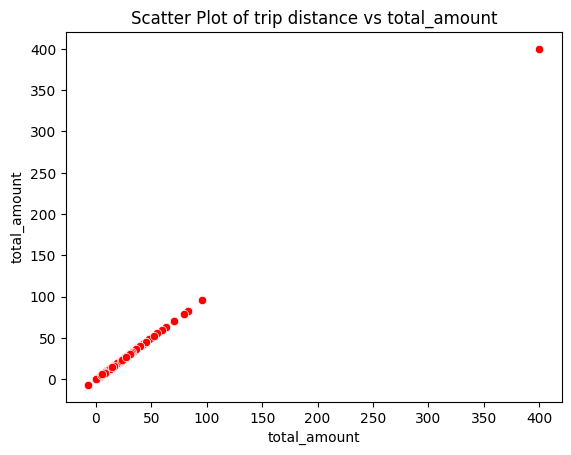

In [84]:
#3. Relationship between total distance and total cost

correlation = df_taxi["total_amount"].corr(df_taxi["total_amount"])

print(f"correlation for distance travelled and amount is {correlation}")

sns.scatterplot(x=df_taxi["total_amount"], y=df_taxi["total_amount"], color="red", alpha=1)
plt.title("Scatter Plot of trip distance vs total_amount")
plt.show()

In [85]:
#4. Which payment type generate the most revenue?

payment = df_taxi.groupby("payment_type")

most_revenue = payment["total_amount"].sum()

print(most_revenue)

print(f"The payment type {most_revenue.idxmax()} generated the maximum revenue of {most_revenue.max()}")

payment_type
1    7398.25
2    6952.90
3       9.30
4      43.30
Name: total_amount, dtype: float64
The payment type 1 generated the maximum revenue of 7398.25


In [86]:
#5. How does tip amount vary with trip distance and fare amount?
print(df_taxi["tip_amount"].corr(df_taxi["trip_distance"]))
print(df_taxi["tip_amount"].corr(df_taxi["fare_amount"]))

0.46409440353303605
0.25445202312699866


In [87]:
#6. Which payment type is most popular?

payment_summary = df_taxi["payment_type"].value_counts(normalize=True) * 100

print(payment_summary)
print(f"The payment method {payment_summary.idxmax()} is most popular with {payment_summary.max()} times")

payment_type
2    54.7
1    44.8
3     0.4
4     0.1
Name: proportion, dtype: float64
The payment method 2 is most popular with 54.7 times


In [88]:
#7. which trip type yeilds more total amount and tip amount

trip = df_taxi.groupby("trip_type")

total_amount = trip["total_amount"].sum()
tip_amount = trip["tip_amount"].sum()

print(total_amount)
print(f"Highest Total amount yeilded is {total_amount.max():.2f} by {total_amount.idxmax()}\n")
print(tip_amount)
print(f"Highest Tip amount yeilded is {tip_amount.max():.2f} by {tip_amount.idxmax()}\n")

total_amount_mean = trip["total_amount"].mean()
tip_amount_mean = trip["tip_amount"].mean()

print("The Average total amount is\n",total_amount_mean, "\nThe Average tip amount is\n", tip_amount_mean)

trip_type
1    13747.65
2      656.10
Name: total_amount, dtype: float64
Highest Total amount yeilded is 13747.65 by 1

trip_type
1    1019.69
2      15.10
Name: tip_amount, dtype: float64
Highest Tip amount yeilded is 1019.69 by 1

The Average total amount is
 trip_type
1    14.056902
2    29.822727
Name: total_amount, dtype: float64 
The Average tip amount is
 trip_type
1    1.042628
2    0.686364
Name: tip_amount, dtype: float64


In [89]:
#8. How does passenger count affect total fare and tips?

total_fare = df_taxi.groupby("passenger_count")

print(total_fare["fare_amount"].mean())

print(total_fare["tip_amount"].mean())

print("So, based on the above table, whenever the passenger count increases total fare increases. Tip amount may be increased or decreased based on circustances.")
print("But, clearly total fare and tip share will decrease whenver passenger count is increased")

passenger_count
1    11.790178
2    16.353333
3    12.159091
4    13.500000
5    10.918919
6    16.583333
Name: fare_amount, dtype: float64
passenger_count
1    1.045479
2    1.123733
3    0.389091
4    1.188889
5    1.082162
6    0.648333
Name: tip_amount, dtype: float64
So, based on the above table, whenever the passenger count increases total fare increases. Tip amount may be increased or decreased based on circustances.
But, clearly total fare and tip share will decrease whenver passenger count is increased


In [90]:
#9. Which vendor has higher average fare, tips, total trips and trip distance?

vendor = df_taxi.groupby("vendorid")

average_fare_amount = vendor["fare_amount"].mean()
average_tip_amount = vendor["tip_amount"].mean()
total_trips = vendor["vendorid"].count()
total_trip_distance = vendor["trip_distance"].sum()

print(average_fare_amount)
print(f"Highest Average Fare is {average_fare_amount.max():.2f} obtained by vendorid {average_fare_amount.idxmax()}\n")
print(average_tip_amount)
print(f"Highest Average Tip is {average_tip_amount.max():.2f} obtained by vendorid {average_tip_amount.idxmax()}\n")
print(total_trips)
print(f"Highest Total trip is {total_trips.max()} operated by vendorid {total_trips.idxmax()}\n")
print(total_trip_distance)
print(f"More Distance travelled is {total_trip_distance.max():.2f} KM which is operated by vendorid {total_trip_distance.idxmax()}\n") 

vendorid
1    11.072650
2    12.519843
Name: fare_amount, dtype: float64
Highest Average Fare is 12.52 obtained by vendorid 2

vendorid
1    1.019915
2    1.039334
Name: tip_amount, dtype: float64
Highest Average Tip is 1.04 obtained by vendorid 2

vendorid
1    234
2    766
Name: vendorid, dtype: int64
Highest Total trip is 766 operated by vendorid 2

vendorid
1     583.80
2    2135.62
Name: trip_distance, dtype: float64
More Distance travelled is 2135.62 KM which is operated by vendorid 2



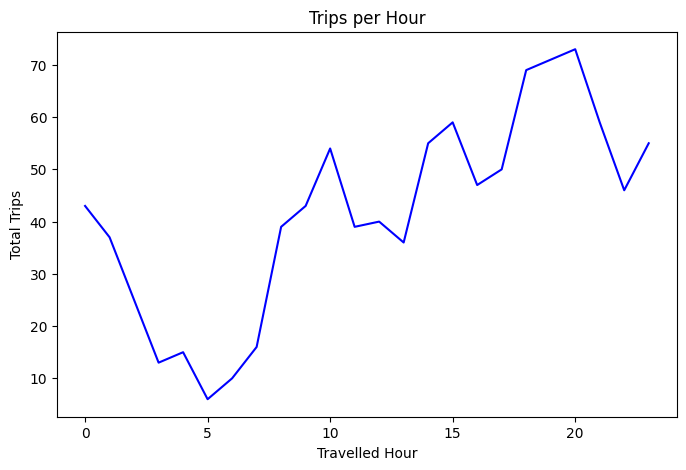

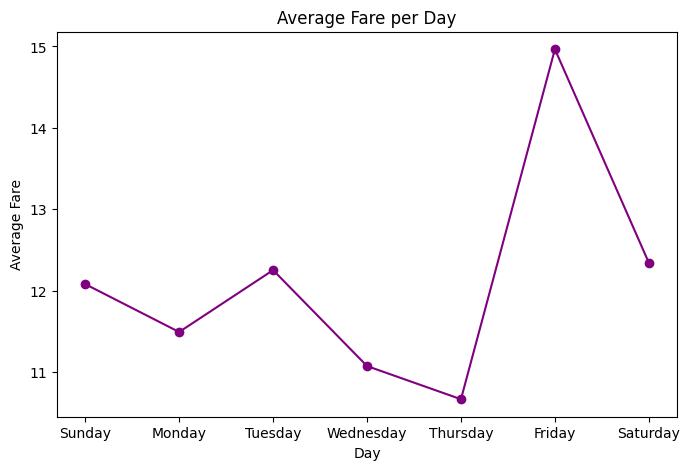

In [91]:
# question based on plotting and visualization
# 1.How does the number of trips change over time (hourly or daily)?
# Use: Trips per hour, Average fare per day

#trips per hour
hour = df_taxi.groupby('travelled_hour').size()
plt.figure(figsize=(8,5))
plt.plot(hour.index, hour.values, color = "blue")
plt.xlabel("Travelled Hour")
plt.ylabel("Total Trips")
plt.title("Trips per Hour")
plt.show()
 
# Average Fare per day
weekday_order = [
    'Sunday', 
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday'
]
#for sorting purpose
df_taxi['weekday'] = pd.Categorical(
    df_taxi['weekday'],
    categories=weekday_order,
    ordered=True
)

Fare = df_taxi.groupby('weekday')["fare_amount"].mean()
plt.figure(figsize=(8,5))
plt.plot(Fare.index, Fare.values, color = "purple", marker = "o")
plt.xlabel("Day")
plt.ylabel("Average Fare")
plt.title("Average Fare per Day")
plt.show()

Trip Distance skewness is 3.170673409149029


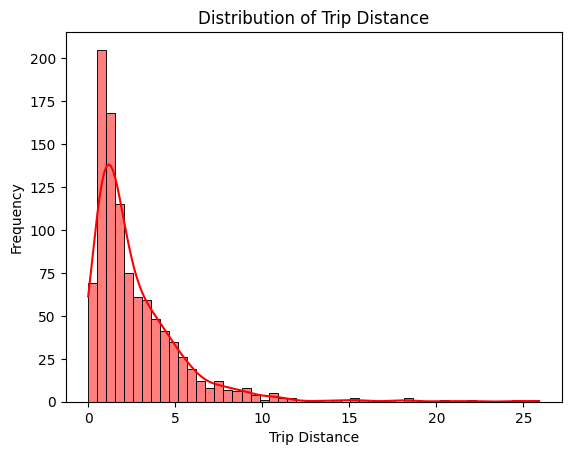

Trip Distance skewness is 15.61391274748628


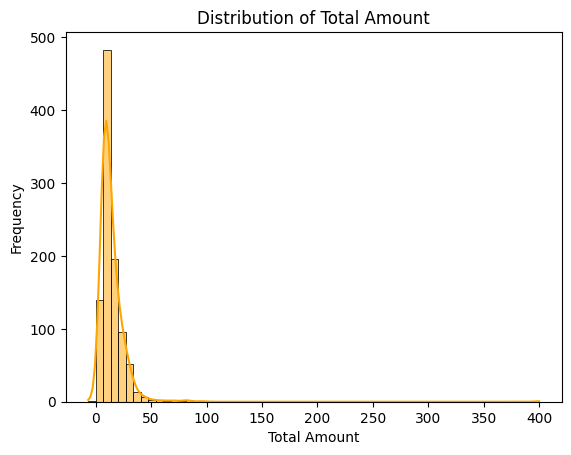

In [92]:
#Histogram Question:
#2. What is the distribution of trip distance and total amount?
# Use: Check skewness, Detect outliers

#Trip Distance Distribution
plt.Figure(figsize=(8,5))
sns.histplot(df_taxi["trip_distance"], bins=50, kde=True, color="red") #bins is used to divide the histogram bars, generally given 40 to 60 for large datasets
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distance")

print(f"Trip Distance skewness is {df_taxi["trip_distance"].skew()}")
plt.show()

#Total Amount Distribution
plt.Figure(figsize=(8,5))
sns.histplot(df_taxi["total_amount"], bins=60, kde=True, color="orange") #bins is used to divide the histogram bars, generally given 40 to 60 for large datasets
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Total Amount")

print(f"Trip Distance skewness is {df_taxi["total_amount"].skew()}")
plt.show()

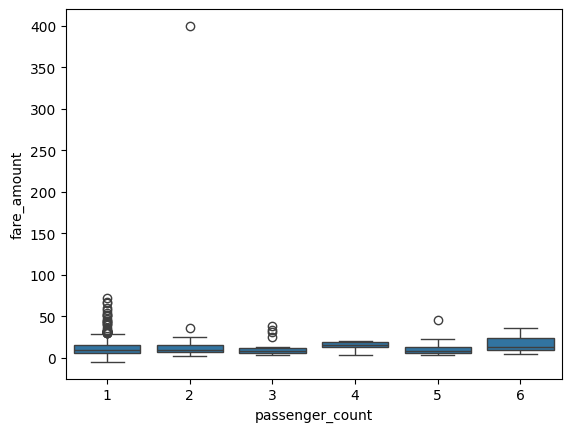

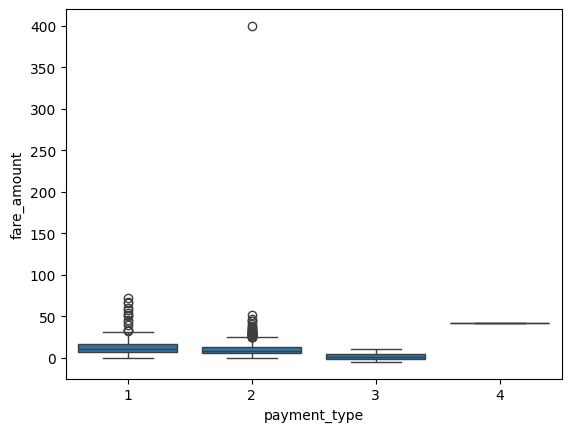

In [93]:
# 3. Box Plot
# Question: How does fare amount vary by payment type or passenger count?
# Use: Fare vs passenger_count, Fare vs payment_type

plt.Figure(figsize=(8,5))

# Fare vs passenger_count
sns.boxplot(x="passenger_count",y="fare_amount", data=df_taxi)
plt.show()

#Fare vs payment_type
sns.boxplot(x="payment_type",y="fare_amount", data=df_taxi)
plt.show()

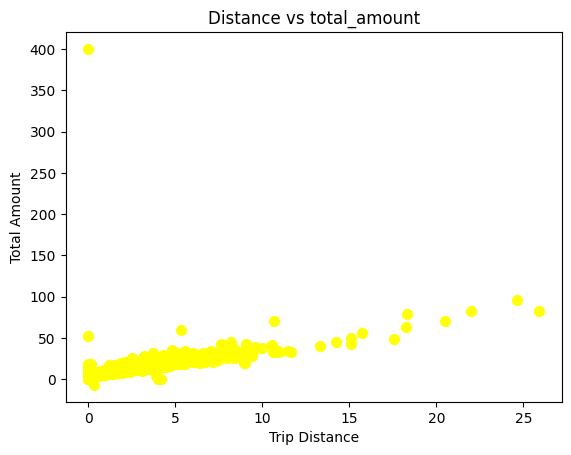

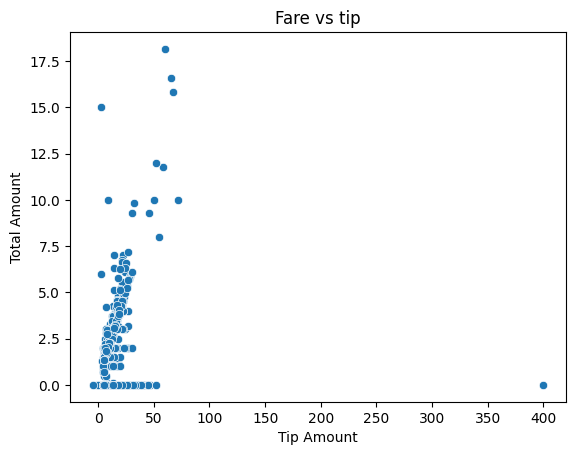

In [94]:
#4. Scatter Plot
# Question Is there a linear relationship between distance and fare?
# Use: Distance vs total_amount, Fare vs tip

#Distance vs total_amount
plt.Figure(figsize=(8,5))
plt.scatter(x=df_taxi["trip_distance"], y=df_taxi["total_amount"], color="yellow", s=50, alpha=0.95)
plt.xlabel("Trip Distance")
plt.ylabel("Total Amount")
plt.title("Distance vs total_amount")
plt.show()

#Fare vs tip
plt.Figure(figsize=(8,5))
sns.scatterplot(x=df_taxi["fare_amount"], y=df_taxi["tip_amount"], data=df_taxi)
plt.xlabel("Tip Amount")
plt.ylabel("Total Amount")
plt.title("Fare vs tip")
plt.show()

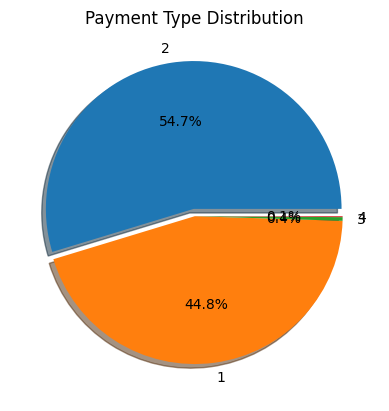

In [95]:
# 5. Pie Chart
# Question:What proportion of trips use each payment type?
# Use: payment_type distribution

plt.Figure(figsize=(5,5))
sizes=df_taxi["payment_type"].value_counts()
explode = (0.05, 0, 0, 0)  # explode first slice

plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title("Payment Type Distribution")
plt.show()


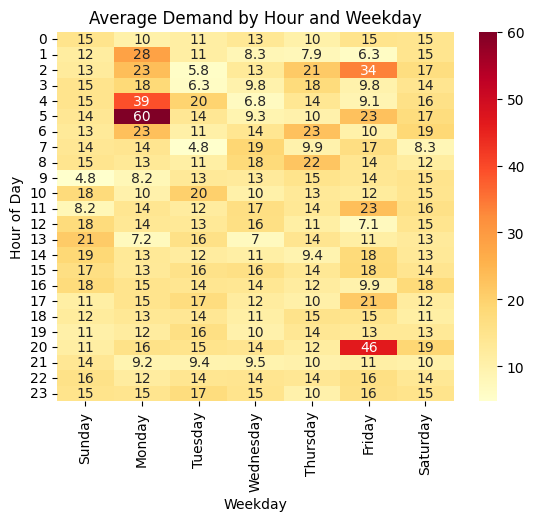

In [96]:
#6. Heatmap 
# Question: At what hours and days is demand highest?
# Use: Hour vs weekday matrix

#creating a pivot table based on hours and weekday
table = df_taxi.pivot_table(index="travelled_hour", columns="weekday", values="total_amount", aggfunc="mean")
table = table.interpolate() # handling NAN values
table = table.bfill() # handling NAN values

plt.Figure(figsize=(12,12))
sns.heatmap(data=table, cmap="YlOrRd", annot=True)
plt.title("Average Demand by Hour and Weekday")
plt.xlabel("Weekday")
plt.ylabel("Hour of Day")
plt.show()

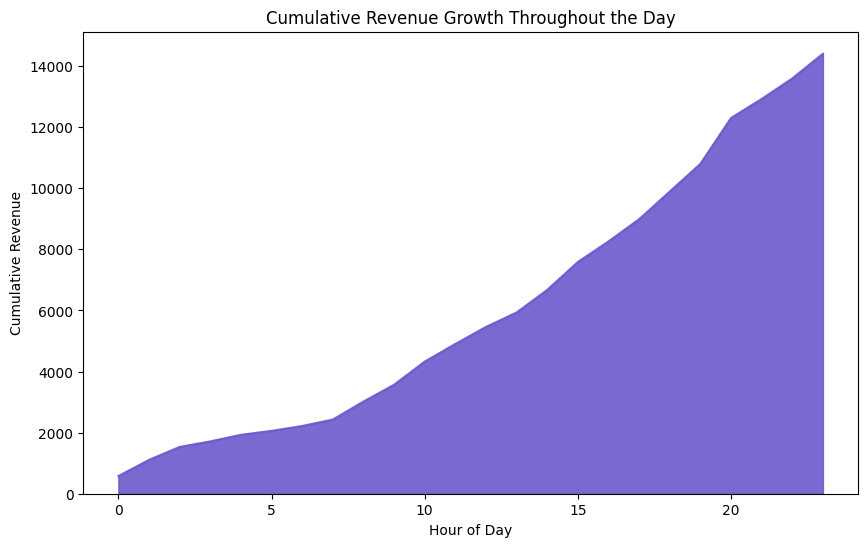

In [97]:
#7. Area Plot
#Question: How does cumulative revenue grow throughout the day?
# Use: Cumulative sum of total_amount

res = df_taxi.groupby("travelled_hour")["total_amount"].sum()
res = res.cumsum()
res.plot.area(figsize=(10,6),color="Slateblue",alpha=0.9)
plt.title("Cumulative Revenue Growth Throughout the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Cumulative Revenue")
plt.show()

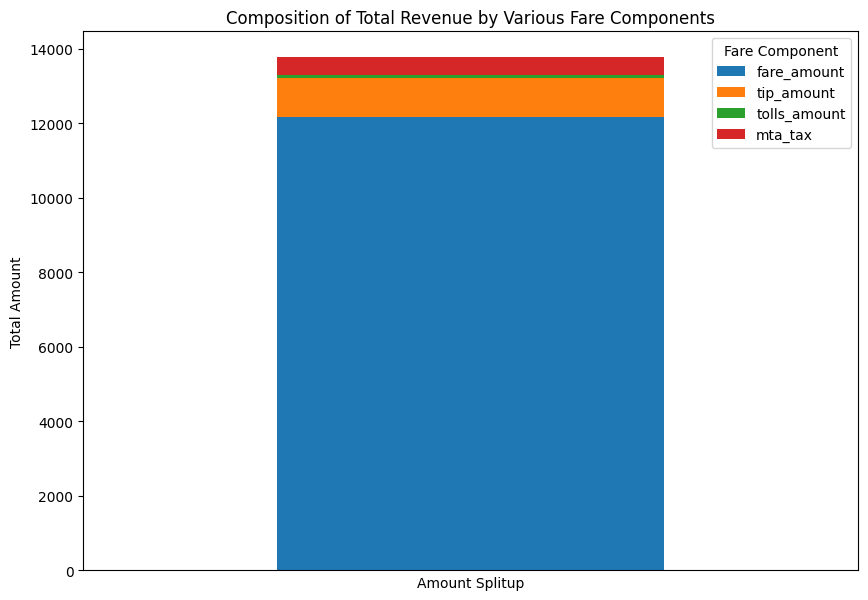

In [117]:
#7. Stacked Bar Chart
# Question: How much of the fare is made up of taxes, tolls, tips, and base fare?
# Use: fare_amount, tip_amount, tolls_amount, taxes

fares = df_taxi[["fare_amount", "tip_amount", "tolls_amount", "mta_tax"]].sum()
fares = fares.to_frame().T # conversion from 2d to 1d

fares.plot(kind="bar", stacked=True, figsize=(10,7))
plt.title("Composition of Total Revenue by Various Fare Components")
plt.xlabel("Amount Splitup")
plt.ylabel("Total Amount")
plt.xticks([])  # Hide x-axis label since only one bar
plt.legend(title="Fare Component")
plt.show()

In [98]:
#loading a weather dataset

weather_data_url = "https://api.open-meteo.com/v1/forecast?latitude=22&longitude=79&hourly=temperature_2m&timezone=GMT&start_date=2025-11-25&end_date=2026-01-31"

response = requests.get(weather_data_url)

if response.status_code == 200:
    print("Data response is successful")
else:
    print(f"Data reterival ended in errors {response.status_code}")

Data response is successful


In [99]:
data_res = response.json()

print(type(data_res))

print(data_res["hourly"]["time"])


<class 'dict'>
['2025-11-25T00:00', '2025-11-25T01:00', '2025-11-25T02:00', '2025-11-25T03:00', '2025-11-25T04:00', '2025-11-25T05:00', '2025-11-25T06:00', '2025-11-25T07:00', '2025-11-25T08:00', '2025-11-25T09:00', '2025-11-25T10:00', '2025-11-25T11:00', '2025-11-25T12:00', '2025-11-25T13:00', '2025-11-25T14:00', '2025-11-25T15:00', '2025-11-25T16:00', '2025-11-25T17:00', '2025-11-25T18:00', '2025-11-25T19:00', '2025-11-25T20:00', '2025-11-25T21:00', '2025-11-25T22:00', '2025-11-25T23:00', '2025-11-26T00:00', '2025-11-26T01:00', '2025-11-26T02:00', '2025-11-26T03:00', '2025-11-26T04:00', '2025-11-26T05:00', '2025-11-26T06:00', '2025-11-26T07:00', '2025-11-26T08:00', '2025-11-26T09:00', '2025-11-26T10:00', '2025-11-26T11:00', '2025-11-26T12:00', '2025-11-26T13:00', '2025-11-26T14:00', '2025-11-26T15:00', '2025-11-26T16:00', '2025-11-26T17:00', '2025-11-26T18:00', '2025-11-26T19:00', '2025-11-26T20:00', '2025-11-26T21:00', '2025-11-26T22:00', '2025-11-26T23:00', '2025-11-27T00:00', '202

In [100]:
print(data_res["hourly"]["temperature_2m"])

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [101]:
#loading the nested dict data to single dict
data_final = {}

M = [x for x in data_res["hourly"]["time"]]
N = [y for y in data_res["hourly"]["temperature_2m"]]

data_final["Time"] = M
data_final["Temperature"] = N

print(data_final["Time"])

['2025-11-25T00:00', '2025-11-25T01:00', '2025-11-25T02:00', '2025-11-25T03:00', '2025-11-25T04:00', '2025-11-25T05:00', '2025-11-25T06:00', '2025-11-25T07:00', '2025-11-25T08:00', '2025-11-25T09:00', '2025-11-25T10:00', '2025-11-25T11:00', '2025-11-25T12:00', '2025-11-25T13:00', '2025-11-25T14:00', '2025-11-25T15:00', '2025-11-25T16:00', '2025-11-25T17:00', '2025-11-25T18:00', '2025-11-25T19:00', '2025-11-25T20:00', '2025-11-25T21:00', '2025-11-25T22:00', '2025-11-25T23:00', '2025-11-26T00:00', '2025-11-26T01:00', '2025-11-26T02:00', '2025-11-26T03:00', '2025-11-26T04:00', '2025-11-26T05:00', '2025-11-26T06:00', '2025-11-26T07:00', '2025-11-26T08:00', '2025-11-26T09:00', '2025-11-26T10:00', '2025-11-26T11:00', '2025-11-26T12:00', '2025-11-26T13:00', '2025-11-26T14:00', '2025-11-26T15:00', '2025-11-26T16:00', '2025-11-26T17:00', '2025-11-26T18:00', '2025-11-26T19:00', '2025-11-26T20:00', '2025-11-26T21:00', '2025-11-26T22:00', '2025-11-26T23:00', '2025-11-27T00:00', '2025-11-27T01:00',

In [102]:
with open("India_Weather_api.csv","w",newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Date","Temperature(Degree C)"])
    for i in range(len(data_final["Time"])):
        writer.writerow([data_final["Time"][i], data_final["Temperature"][i]])

In [103]:
df_ind = pd.read_csv("India_Weather_api.csv", parse_dates=['Date'])
df_ind

,Date,Temperature(Degree C)
0,2025-11-25 00:00:00,NaN
1,2025-11-25 01:00:00,NaN
2,2025-11-25 02:00:00,NaN
3,2025-11-25 03:00:00,NaN
4,2025-11-25 04:00:00,NaN
...,...,...
1627,2026-01-31 19:00:00,17.0
1628,2026-01-31 20:00:00,16.8
1629,2026-01-31 21:00:00,16.5
1630,2026-01-31 22:00:00,16.1


In [104]:
df_ind.shape

(1632, 2)

In [105]:
df_ind.describe()

,Date,Temperature(Degree C)
count,1632,1073.000000
mean,2025-12-28 23:30:00,18.069897
min,2025-11-25 00:00:00,6.300000
25%,2025-12-11 23:45:00,13.900000
50%,2025-12-28 23:30:00,17.900000
75%,2026-01-14 23:15:00,22.900000
max,2026-01-31 23:00:00,28.000000
std,NaN,5.213428


In [106]:
df_ind.info()

<class 'pandas.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1632 non-null   datetime64[us]
 1   Temperature(Degree C)  1073 non-null   float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 25.6 KB


In [107]:
#filling the Nan values using ffill, bfill, mean

df_ind = df_ind.fillna({
    'Temperature(Degree C)': np.mean(df_ind["Temperature(Degree C)"])
})

#df_ind = df_ind.fillna(ffill)
#df_ind = df_ind.fillna(bfill)
df_ind


,Date,Temperature(Degree C)
0,2025-11-25 00:00:00,18.069897
1,2025-11-25 01:00:00,18.069897
2,2025-11-25 02:00:00,18.069897
3,2025-11-25 03:00:00,18.069897
4,2025-11-25 04:00:00,18.069897
...,...,...
1627,2026-01-31 19:00:00,17.000000
1628,2026-01-31 20:00:00,16.800000
1629,2026-01-31 21:00:00,16.500000
1630,2026-01-31 22:00:00,16.100000


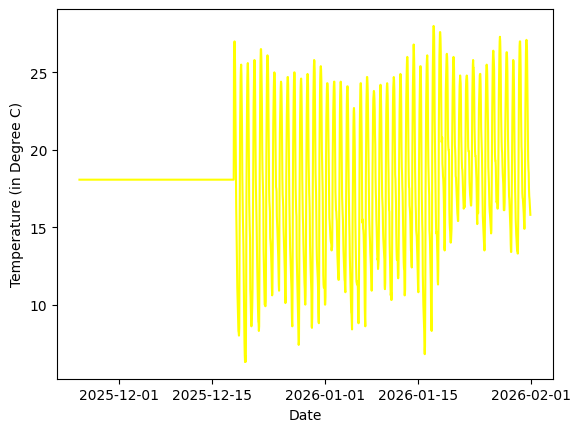

In [108]:
plt.plot(df_ind["Date"],df_ind["Temperature(Degree C)"], color="yellow")
plt.xlabel("Date")
plt.ylabel("Temperature (in Degree C)")

plt.show()